## Observations and Insights

1. Ramicane and Capomulin were the only two drugs that reduced the tumor sizes. They were the only two drugs with average final tumor volume less than the starting tumor volume (45 mm3) for each mouse. The rest of the drugs just slowed the tumor growths down or were ineffective. 
2. The heavier the mouse the more likely they will have a larger tumor volume. Sex of the mouse did not matter since the data was split evenly between genders.
3. Data might be slightly skewed for Ramican and Capomulin because those two drugs had more data points than the rest of the drugs

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
complete_table = pd.merge(mouse_metadata, study_results, on="Mouse ID")
complete_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [4]:
drug_grouped_df = complete_table.groupby(['Drug Regimen'])

for drug in drug_grouped_df["Drug Regimen"]:
    mean_tumor_vol = drug_grouped_df['Tumor Volume (mm3)'].mean()
    median_tumor_vol = drug_grouped_df['Tumor Volume (mm3)'].median()
    tumor_vol_variance = drug_grouped_df['Tumor Volume (mm3)'].var()
    tumor_vol_std_dev = drug_grouped_df['Tumor Volume (mm3)'].std()
    tumor_vol_std_eer = drug_grouped_df['Tumor Volume (mm3)'].sem()

tumor_vol_summary_stat = pd.DataFrame({                              
                                'Mean Tumor Volume': mean_tumor_vol,
                                'Median Tumor Volume': median_tumor_vol,
                                'Tumor Volume Variance': tumor_vol_variance,
                                'Tumor Volume Std. Dev.': tumor_vol_std_dev,
                                'Tumor Volume Std. Err.': tumor_vol_std_eer})
tumor_vol_summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Number of Data Points')

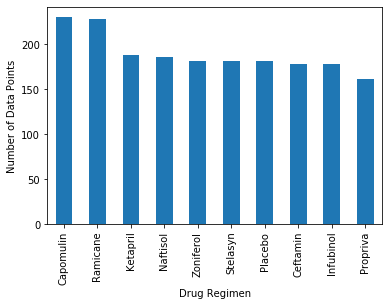

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Get the amount of each drugs' data points and their corresponding drug name
drug_data_points = complete_table['Drug Regimen'].value_counts()
drug_names = complete_table['Drug Regimen'].value_counts().keys()

# Set x axis and tick locations
x_axis = np.arange(len(drug_names))
tick_locations = [value for value in x_axis]

# Plot bar chart, format it, and add labels
drug_data_points.plot(kind="bar")
plt.xticks(tick_locations, drug_names, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

Text(0, 0.5, 'Number of Data Points')

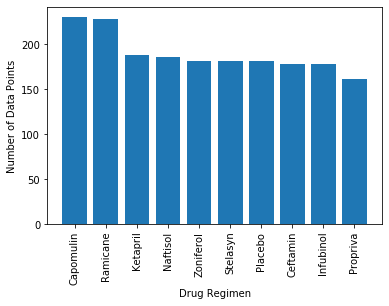

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

plt.bar(x_axis, drug_data_points, alpha=1, align="center")
plt.xticks(tick_locations, drug_names, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

## Pie plots

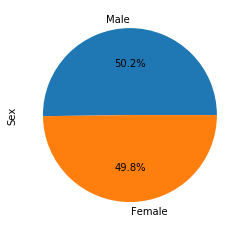

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

unique_id = complete_table.drop_duplicates(subset ="Mouse ID")
sex_points = unique_id['Sex'].value_counts()
sex_points.plot(kind="pie",autopct='%1.1f%%')

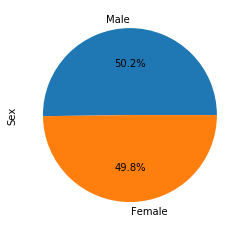

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_names = unique_id['Sex'].value_counts().keys()
plt.pie(sex_points, labels=sex_names, autopct="%1.1f%%")
ylabel=plt.ylabel("Sex")

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Groupyby Drug Regimen and MouseID and only get row with maximum Timepoint for each Mouse ID and make into dataframe
drug_mouse_grouped_df = complete_table.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max().to_frame()

# Merge groupby dataframe with original dataframe on Mouse ID and Timepoint to get last tumor volumes
merged_df = pd.merge(drug_mouse_grouped_df, complete_table, on=['Mouse ID',"Timepoint"])

# Get tumor volume column and sort by tumor volume
merged_df = merged_df[['Drug Regimen','Tumor Volume (mm3)']]
merged_df.sort_values(by=['Tumor Volume (mm3)'], inplace=True)
print(merged_df)

# Groupby Drug Regimen so that I can get mean of tumor volume
drug_grouped_merged_df = merged_df.groupby(['Drug Regimen'])

for drug in drug_grouped_merged_df["Drug Regimen"]:
    mean_tumor_vol = drug_grouped_df['Tumor Volume (mm3)'].mean()

# Sort mean tumor volume per drug 
mean_tumor_vol.sort_values(inplace=True)
print(mean_tumor_vol)

# Grab the top four drugs with the smallest avg tumor volumes
best_drugs = mean_tumor_vol.keys().to_list()
best_drugs = best_drugs[0:4]
print('--------------------------------------------------')
print(f'These are the top 4 promising drugs: {best_drugs}')

# MY SOLUTION IS SHOWING RAMICANE, CAPOMULIN, PROPRIVA, AND CEFTAMIN AS THE TOP FOUR DRUGS BASED OF AVERAGE FINAL TUMOR VOLUME!!

    Drug Regimen  Tumor Volume (mm3)
188     Ramicane           22.050126
16     Capomulin           23.343598
11     Capomulin           28.430964
23     Capomulin           28.484033
183     Ramicane           29.128472
..           ...                 ...
114     Naftisol           75.113288
212     Stelasyn           75.123690
93      Ketapril           75.294936
108     Naftisol           76.668817
91      Ketapril           78.567014

[249 rows x 2 columns]
Drug Regimen
Ramicane     40.216745
Capomulin    40.675741
Propriva     52.322552
Ceftamin     52.591172
Infubinol    52.884795
Zoniferol    53.236507
Placebo      54.033581
Stelasyn     54.233149
Naftisol     54.331565
Ketapril     55.235638
Name: Tumor Volume (mm3), dtype: float64
--------------------------------------------------
These are the top 4 promising drugs: ['Ramicane', 'Capomulin', 'Propriva', 'Ceftamin']


In [10]:
tumor_vol = []

# Set index as Drugs so that we can use loc
drug_regimen_df = merged_df.set_index("Drug Regimen")

# Loop through dataframe for only the top 4 drugs and get the IQR and determine if there are any outliers
for drug in best_drugs:
    drug_vols = drug_regimen_df.loc[drug, ['Tumor Volume (mm3)']]
    quartiles = drug_vols['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The lower quartile of {drug}'s tumor volumes (mm3) is: {lowerq}")
    print(f"The upper quartile of {drug}'s tumor volumes (mm3) is: {upperq}")
    print(f"The interquartile range of {drug}'s tumor volumes (mm3) is: {iqr}")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    
    # Loop through each tumor volume for that drug and says if it is an outlier
    for i in drug_vols['Tumor Volume (mm3)']:        
        if i > upper_bound or i < lower_bound:
            print(f'{i} is an outlier for {drug}')

    # Create list of tumor volumes for plotting
    tumor_vol.append(drug_vols['Tumor Volume (mm3)'].to_list())
    print('')
    

The lower quartile of Ramicane's tumor volumes (mm3) is: 31.56046955
The upper quartile of Ramicane's tumor volumes (mm3) is: 40.65900627
The interquartile range of Ramicane's tumor volumes (mm3) is: 9.098536719999998
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.

The lower quartile of Capomulin's tumor volumes (mm3) is: 32.37735684
The upper quartile of Capomulin's tumor volumes (mm3) is: 40.1592203
The interquartile range of Capomulin's tumor volumes (mm3) is: 7.781863460000004
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.

The lower quartile of Propriva's tumor volumes (mm3) is: 49.12296898
The upper quartile of Propriva's tumor volumes (mm3) is: 62.57087961
The interquartile range of Propriva's tumor volumes (mm3) is: 13.447910629999996
Values below 28.95110303500001 for Propriva could be outliers.
Values above 82.742745555 for Propr

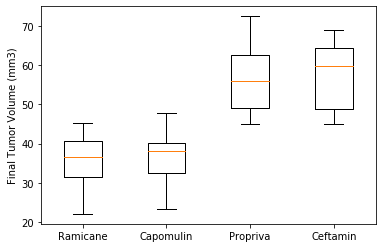

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# I PLOTTED MY TOP FOUR DRUGS: RAMICANE, CAPOMULIN, PROPRIVA, AND CEFTAMIN
fig, ax = plt.subplots()
ax.boxplot(tumor_vol)
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xticklabels(best_drugs)
plt.show()

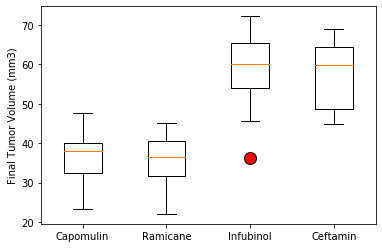

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# HOMEWORK SOLUTION PROVIDED BY TA'S

## Line and scatter plots

(0, 50)

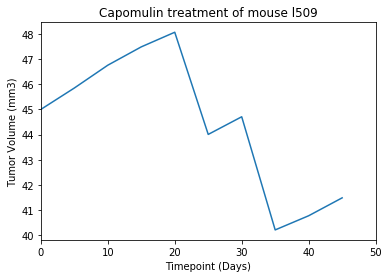

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Pick choice for drug and mouse ID 
drug_choice = "Capomulin"
mouse_id_choice = 'l509'

# Use indexing and loc to filter down to drug choice first then mouse ID
drug_regimen_df = complete_table.set_index("Drug Regimen")
drug_choice_df = drug_regimen_df.loc[drug_choice, ['Mouse ID','Timepoint','Tumor Volume (mm3)']]
drug_choice_id_df = drug_choice_df.set_index('Mouse ID')
drug_choice_mouse_choice_df = drug_choice_id_df.loc[mouse_id_choice,:]
drug_choice_mouse_choice_df

# Plot Timepoint vs Tumor Vol for drug and mouse of your choice
drug_choice_mouse_choice_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)', legend=False)

# Format plot with titles and axis titles
plt.title(drug_choice+" treatment of mouse "+mouse_id_choice)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, 50)

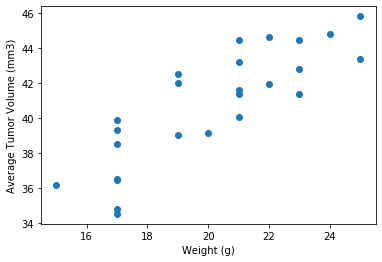

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Set index to drugs so we can filter rows only down to Capomulin
drug_index_df = complete_table.set_index(['Drug Regimen'])
capomulin_df = drug_index_df.loc['Capomulin']

# Groupby Mouse ID so that averages for each mouse tumor volume can be taken
capomulin_df = capomulin_df.groupby(['Mouse ID'])

# Loop through to get each mouse's average weight and tumor volume
for mouse in capomulin_df["Mouse ID"]:
    mean_weight = capomulin_df["Weight (g)"].mean()
    mean_tumor_vol = capomulin_df["Tumor Volume (mm3)"].mean()

# Plot out Average Tumor Volume versus Weight
x_values = mean_weight
y_values = mean_tumor_vol
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is: 0.84


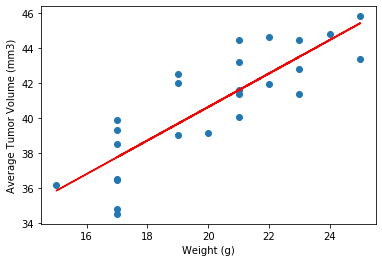

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print('The correlation between mouse weight and the average tumor volume is: {}'.format(round(rvalue,2)))
plt.show()